# Image Colorization with Convolutional Neural Networks in Keras
Author: Chin Yang

##Preliminary implementation
Implementing the Github demo code in the paper "Colorful Image Colorization" published from ECCV 2016.

Paper: https://link.springer.com/chapter/10.1007/978-3-319-46487-9_40

Project page: http://richzhang.github.io/colorization/

Github page: https://github.com/richzhang/colorization

### Setup
Copy the required files from https://github.com/richzhang/colorization reoisitories

In [2]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

# Copy the files
# Change the ipynb file dir 'drive/MyDrive/ece570/checkpoint2'

! cp drive/MyDrive/ece570/checkpoint2/colorizers/__init__.py .
! cp drive/MyDrive/ece570/checkpoint2/colorizers/siggraph17.py .
! cp drive/MyDrive/ece570/checkpoint2/colorizers/eccv16.py .
! cp drive/MyDrive/ece570/checkpoint2/colorizers/util.py .
! cp drive/MyDrive/ece570/checkpoint2/colorizers/base_color.py .

Mounted at /content/drive


### Test the pretrained colorization networks
modified from `demo_release.py`  in https://github.com/richzhang/colorization

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


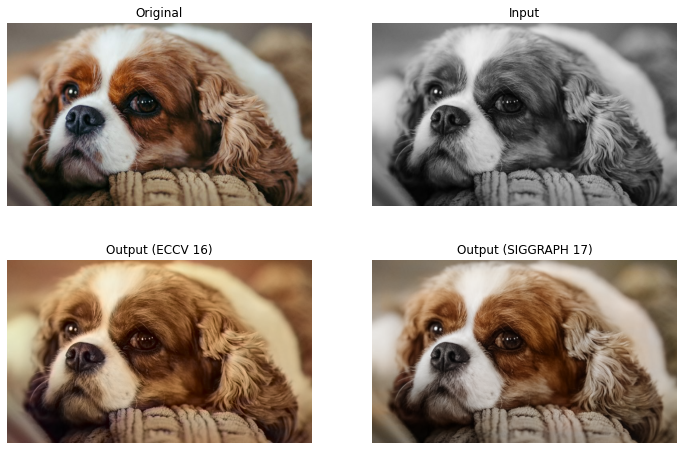

In [ ]:
import argparse
import matplotlib.pyplot as plt
from __init__ import *

#####################################################################################################################################################
# Function to demo the network
def Demo_network(img_dir):
  # Load the test image
  parser = argparse.ArgumentParser()
  parser.add_argument('-i','--img_path', type=str, default=img_dir)
  parser.add_argument('--use_gpu', action='store_true', help='whether to use GPU')
  parser.add_argument('-o','--save_prefix', type=str, default='saved', help='will save into this file with {eccv16.png, siggraph17.png} suffixes')
  parser.add_argument('-f')
  opt = parser.parse_args()
  # load colorizers
  colorizer_eccv16 = eccv16(pretrained=True).eval()
  colorizer_siggraph17 = siggraph17(pretrained=True).eval()
  if(opt.use_gpu):
    colorizer_eccv16.cuda()
    colorizer_siggraph17.cuda()
  img = load_img(opt.img_path)
  (tens_l_orig, tens_l_rs) = preprocess_img(img, HW=(256,256))
  if(opt.use_gpu):
    tens_l_rs = tens_l_rs.cuda()
  img_bw = postprocess_tens(tens_l_orig, torch.cat((0*tens_l_orig,0*tens_l_orig),dim=1))
  out_img_eccv16 = postprocess_tens(tens_l_orig, colorizer_eccv16(tens_l_rs).cpu())
  out_img_siggraph17 = postprocess_tens(tens_l_orig, colorizer_siggraph17(tens_l_rs).cpu())

  plt.imsave('%s_eccv16.png'%opt.save_prefix, out_img_eccv16)
  plt.imsave('%s_siggraph17.png'%opt.save_prefix, out_img_siggraph17)
  # Plot the colorization results
  plt.figure(figsize=(12,8))
  plt.subplot(2,2,1)
  plt.imshow(img)
  plt.title('Original')
  plt.axis('off')

  plt.subplot(2,2,2)
  plt.imshow(img_bw)
  plt.title('Input')
  plt.axis('off')

  plt.subplot(2,2,3)
  plt.imshow(out_img_eccv16)
  plt.title('Output (ECCV 16)')
  plt.axis('off')

  plt.subplot(2,2,4)
  plt.imshow(out_img_siggraph17)
  plt.title('Output (SIGGRAPH 17)')
  plt.axis('off')
  plt.show()
#####################################################################################################################################################
# Change the ipynb file dir
your_ipynb_file_dir = '/content/drive/MyDrive/ece570/checkpoint2'
# Get the img dir
img_dir = '/'.join([your_ipynb_file_dir, 'imgs/dog2.jpeg'])
Demo_network(img_dir)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 58 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


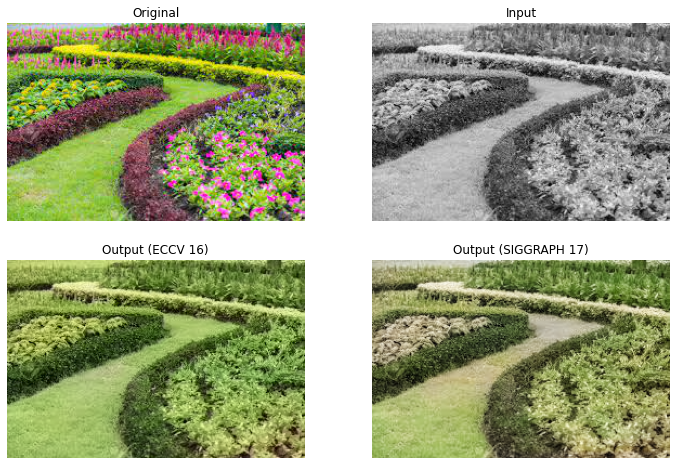

In [ ]:
# Test for the next image
# Get the img dir
img_dir = '/'.join([your_ipynb_file_dir, 'imgs/garden1.jpeg'])
Demo_network(img_dir)

### Apply salt and pepper noise to the image
Added code by student

In [ ]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


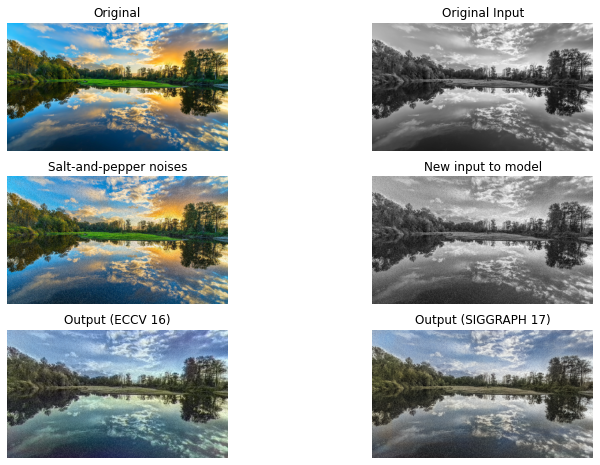

In [ ]:
# Test the salt and pepper effect
img = load_img('drive/MyDrive/ece570/checkpoint2/imgs/view.jpeg')
(tens_l_orig, tens_l_rs) = preprocess_img(img, HW=(256,256))
img_bw = postprocess_tens(tens_l_orig, torch.cat((0*tens_l_orig,0*tens_l_orig),dim=1))
noise_img = sp_noise(img,0.05)
colorizer_eccv16 = eccv16(pretrained=True).eval()
colorizer_siggraph17 = siggraph17(pretrained=True).eval()
(tens_l_orig, tens_l_rs) = preprocess_img(noise_img, HW=(256,256))
noise_img_bw = postprocess_tens(tens_l_orig, torch.cat((0*tens_l_orig,0*tens_l_orig),dim=1))
out_img_eccv16 = postprocess_tens(tens_l_orig, colorizer_eccv16(tens_l_rs).cpu())
out_img_siggraph17 = postprocess_tens(tens_l_orig, colorizer_siggraph17(tens_l_rs).cpu())

  
plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(3,2,2)
plt.imshow(img_bw)
plt.title('Original Input')
plt.axis('off')

plt.subplot(3,2,3)
plt.imshow(noise_img)
plt.title('Salt-and-pepper noises')
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(noise_img_bw)
plt.title('New input to model')
plt.axis('off')

plt.subplot(3,2,5)
plt.imshow(out_img_eccv16)
plt.title('Output (ECCV 16)')
plt.axis('off')

plt.subplot(3,2,6)
plt.imshow(out_img_siggraph17)
plt.title('Output (SIGGRAPH 17)')
plt.axis('off')
plt.show()

## Implementation
Referencing the code in super_resolution_sub_pixel: https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/super_resolution_sub_pixel.ipynb#scrollTo=RmAmzu_w36D9

### Setup

In [3]:
# Dowmload the required module
import tensorflow as tf

import os
import math
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

from IPython.display import display
import torchvision
import matplotlib.pyplot as plt
from __init__ import *
from PIL import Image

### Load data: BSDS500 dataset

#### Download dataset from https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/resources.html

Using the built-in `keras.utils.get_file` utility to retrieve the dataset.

In [4]:
# Download dataset
dataset_url = "http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz"
data_dir = keras.utils.get_file(origin=dataset_url, fname="BSR", untar=True)
root_dir = os.path.join(data_dir, "BSDS500/data")

70778880/70763455 [==============================] - 35s 0us/step


Create training and validation datasets with `image_dataset_from_directory`.

In [5]:
# Create training and validation datasets

crop_size = 256
upscale_factor = 3
input_size = crop_size // upscale_factor
batch_size = 8

train_ds = image_dataset_from_directory(
    root_dir,
    batch_size=batch_size,
    image_size=(crop_size, crop_size),
    validation_split=0.2,
    subset="training",
    seed=1337,
    label_mode=None,
)

valid_ds = image_dataset_from_directory(
    root_dir,
    batch_size=batch_size,
    image_size=(crop_size, crop_size),
    validation_split=0.2,
    subset="validation",
    seed=1337,
    label_mode=None,
)

Found 500 files belonging to 1 classes.
Using 400 files for training.
Found 500 files belonging to 1 classes.
Using 100 files for validation.


Rescale the images

In [6]:
def scaling(input_image):
    input_image = input_image / 255.0
    return input_image


# Scale from (0, 255) to (0, 1)
train_ds = train_ds.map(scaling)
valid_ds = valid_ds.map(scaling)
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>


Download test dataset

In [7]:
dataset = os.path.join(root_dir, "images")
test_path = os.path.join(dataset, "test")

test_img_paths = sorted(
    [
        os.path.join(test_path, fname)
        for fname in os.listdir(test_path)
        if fname.endswith(".jpg")
    ]
)

## Process image data
Convert the images from the RGB color space to the YUV color space

Crop the image for the input data (black and white image), get the 'y' channel (luninance), then resize it with the 'area' technique.
Because humans are more sensitive to luminance changes, we only evaluate the luminance channel in the YUV color space.

For the target data (coloeful images), we just crop the image.

In [8]:
def process_input(input):
    input = tf.image.rgb_to_yuv(input)
    last_dimension_axis = len(input.shape) - 1
    y, u, v = tf.split(input, 3, axis=last_dimension_axis)
    return tf.image.resize(y, [256, 256], method="area")

train_ds = train_ds.map(
    lambda x: (process_input(x), x)
)
train_ds = train_ds.prefetch(buffer_size=32)

valid_ds = valid_ds.map(
    lambda x: (process_input(x), x)
)
valid_ds = valid_ds.prefetch(buffer_size=32)

### Visualize train dataset

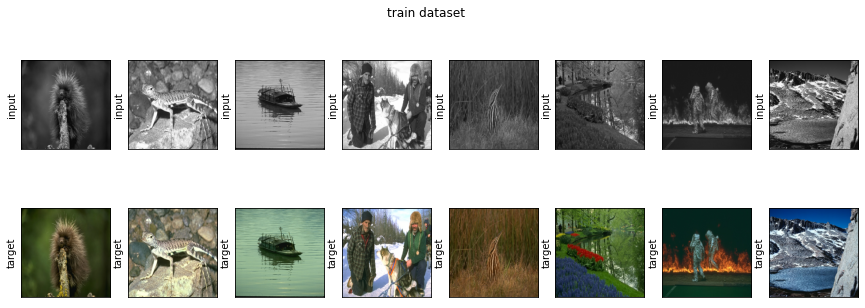

In [9]:
fig,ax = plt.subplots(2,8)
fig.set_size_inches(15,5)

idx=0
for batch in train_ds.take(1):
    for img1, img2 in zip(batch[0],batch[1]):

        img1 = np.stack((img1[:,:,0],)*3, axis=-1)
        ax[0,idx].imshow(img1, cmap='gray')
        ax[0,idx].set_xticks([])
        ax[0,idx].set_yticks([])
        ax[0,idx].set_ylabel('input', fontsize='medium')
        ax[1,idx].imshow(img2, cmap='gray')
        ax[1,idx].set_xticks([])
        ax[1,idx].set_yticks([])
        ax[1,idx].set_ylabel('target', fontsize='medium')
        idx+=1

fig.suptitle('train dataset')
fig.show()

### Visualize validation dataset

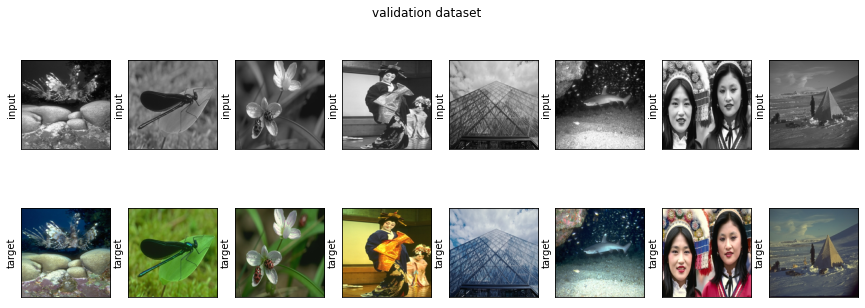

In [10]:

fig,ax = plt.subplots(2,8)
fig.set_size_inches(15,5)

idx=0
for batch in valid_ds.take(1):
    for img1, img2 in zip(batch[0],batch[1]):

        img1 = np.stack((img1[:,:,0],)*3, axis=-1)
        ax[0,idx].imshow(img1, cmap='gray')
        ax[0,idx].set_xticks([])
        ax[0,idx].set_yticks([])
        ax[0,idx].set_ylabel('input', fontsize='medium')
        ax[1,idx].imshow(img2, cmap='gray')
        ax[1,idx].set_xticks([])
        ax[1,idx].set_yticks([])
        ax[1,idx].set_ylabel('target', fontsize='medium')
        idx+=1

fig.suptitle('validation dataset')
fig.show()

## Define utility functions to monitor the results

- `plot_results` to plot an image.
- `resize_input` to resize the input image.
- `colorize_image` to turn a black and white image to
a colorful version reconstructed by the model.

In [9]:
import matplotlib.pyplot as plt
import PIL


def plot_results(img, prefix, title):
    """Plot the result with zoom-in area."""
    img_array = img_to_array(img)
    img_array = img_array.astype("float32") / 255.0

    # Create a new figure with a default 111 subplot.
    fig, ax = plt.subplots()
    im = ax.imshow(img_array[::-1], origin="lower")

    plt.title(title)
    plt.yticks(visible=False)
    plt.xticks(visible=False)
    plt.show()


def resize_input(img):
    """Return low-resolution image to use as model input."""

    resized_img = img.resize((256, 256),PIL.Image.BICUBIC,)
    return resized_img


def colorize_image(model, img):
    ycbcr = img.convert("YCbCr")
    y, cb, cr = ycbcr.split()
    y = img_to_array(y)
    y = y.astype("float32") / 255.0

    input = np.expand_dims(y, axis=0)
    out = model.predict(input)

    out_img_y = out[0] + y
    out_img_y *= 255.0
    out_img_y = out_img_y.clip(0, 255)
    out_img = array_to_img(out_img_y)
    return out_img


## Define callbacks to monitor training

In [10]:
class Callback(keras.callbacks.Callback):
    def __init__(self):
        super(Callback, self).__init__()
        self.test_img = resize_input(tf.keras.utils.load_img(test_img_paths[0]))
        #,grayscale=True


    # Store loss value in each epoch.
    def on_epoch_begin(self, epoch, logs=None):
        self.loss = []

    def on_epoch_end(self, epoch, logs=None):
        
        print("Mean loss for epoch: %.2f" % (np.mean(self.loss)))
        #if epoch % 20 == 0:
        prediction = colorize_image(self.model, self.test_img)
        plot_results(prediction, "epoch-" + str(epoch), "prediction")
        plt.plot(self.loss)
        plt.show()

    def on_test_batch_end(self, batch, logs=None):
        self.loss.append(logs["loss"])

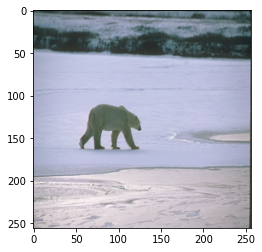

In [12]:
test_img = resize_input(tf.keras.utils.load_img(test_img_paths[0]))
plt.imshow(test_img)

## Build the model
Convert the CNN network from paper's Github to be in Keras

In [13]:
def get_model(channels=1):

    inputs = keras.Input(shape=(256, 256, channels))
    x = layers.Conv2D(64, 3, (1, 1), activation='relu', padding = 'same')((inputs-50)/100)
    x = layers.Conv2D(64, 3, (2, 2), activation='relu', padding = 'same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(128, 3, (1, 1), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(128, 3, (2, 2), activation='relu', padding = 'same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(256, 3, (1, 1), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(256, 3, (1, 1), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(256, 3, (2, 2), activation='relu', padding = 'same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(512, 3, (1, 1), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(512, 3, (1, 1), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(512, 3, (1, 1), activation='relu', padding = 'same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(512, 3, (1, 1), dilation_rate=(2, 2), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(512, 3, (1, 1), dilation_rate=(2, 2), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(512, 3, (1, 1), dilation_rate=(2, 2), activation='relu', padding = 'same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(512, 3, (1, 1), dilation_rate=(2, 2), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(512, 3, (1, 1), dilation_rate=(2, 2), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(512, 3, (1, 1), dilation_rate=(2, 2), activation='relu', padding = 'same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(512, 3, (1, 1), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(512, 3, (1, 1), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(512, 3, (1, 1), activation='relu', padding = 'same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2DTranspose(256, 3, (1, 1), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(256, 3, (1, 1), activation='relu', padding = 'same')(x)
    x = layers.Conv2D(256, 3, (1, 1), activation='relu', padding = 'same')(x)

    x = layers.Conv2D(313, 1, (1, 1), padding = 'valid')(x)
    x = layers.Softmax(axis=1)(x)
    x = layers.Conv2D(3, 1, (1, 1), dilation_rate=(1, 1), activation='relu', padding = 'valid')(x)
    x = layers.UpSampling2D(size=(8, 8), data_format=None, interpolation='bilinear')(x)
    outputs = x*110

    return keras.Model(inputs, outputs)


Define `ModelCheckpoint` and `EarlyStopping` callbacks.

In [14]:
early_stopping_callback = keras.callbacks.EarlyStopping(monitor="loss", patience=10)

checkpoint_filepath = "/tmp/checkpoint"

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor="loss",
    mode="min",
    save_best_only=True,
)

model = get_model(channels=1)
model.summary()

callbacks = [Callback(), early_stopping_callback, model_checkpoint_callback]
loss_fn = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adam(learning_rate=0.001)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 tf.math.subtract (TFOpLambd  (None, 256, 256, 1)      0         
 a)                                                              
                                                                 
 tf.math.truediv (TFOpLambda  (None, 256, 256, 1)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256   

## Train the model

In [15]:
epochs = 50

model.compile(
    optimizer=optimizer, loss=loss_fn,
)

model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=valid_ds, verbose=2
)

# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

Output hidden; open in https://colab.research.google.com to view.

## Run model prediction and plot the results

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


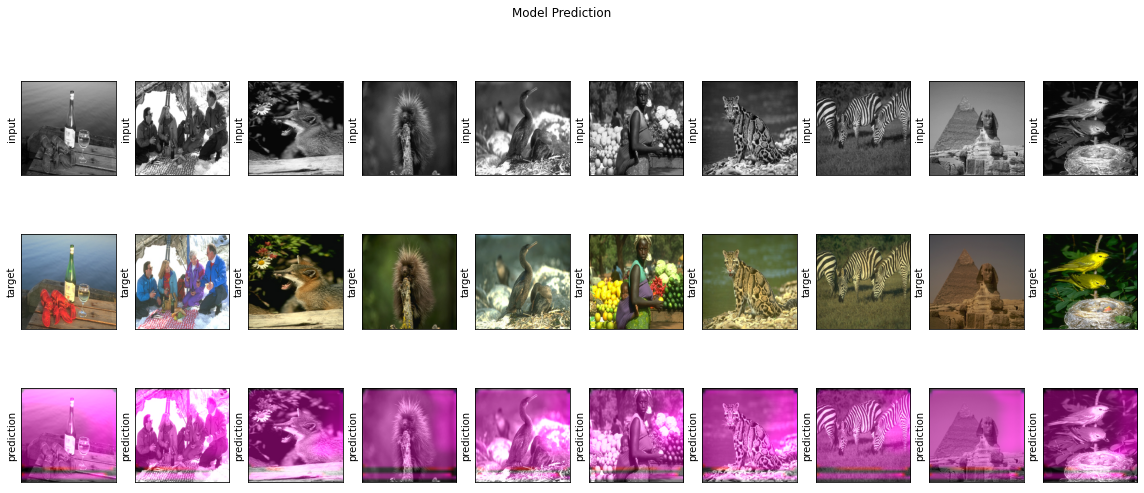

In [16]:
fig,ax = plt.subplots(3,10, sharey=True)
fig.set_size_inches(20,8)

for index, test_img_path in enumerate(test_img_paths[50:60]):

    input = resize_input(tf.keras.preprocessing.image.load_img(test_img_path,grayscale=True))
    target = resize_input(tf.keras.preprocessing.image.load_img(test_img_path,grayscale=False))
    prediction = colorize_image(model, input)

    ax[0,index].imshow(input, cmap='gray')
    ax[0,index].set_xticks([])
    ax[0,index].set_yticks([])
    ax[0,index].set_ylabel('input', fontsize='medium')
    ax[1,index].imshow(target, cmap='gray')
    ax[1,index].set_xticks([])
    ax[1,index].set_yticks([])
    ax[1,index].set_ylabel('target', fontsize='medium')
    ax[2,index].imshow(prediction, cmap='gray')
    ax[2,index].set_xticks([])
    ax[2,index].set_yticks([])
    ax[2,index].set_ylabel('prediction', fontsize='medium')
fig.suptitle('Model Prediction')
fig.show()